In [60]:
import pandas as pd

# Load the dataset
data = pd.read_excel("NEWdataset.xlsx", header=1)

# Display the first few rows of the dataframe
data.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
# Lets see the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          2000 non-null   int64
 1   LIMIT_BAL                   2000 non-null   int64
 2   GENDER                      2000 non-null   int64
 3   EDUCATION                   2000 non-null   int64
 4   MARRIAGE                    2000 non-null   int64
 5   AGE                         2000 non-null   int64
 6   PAY_1                       2000 non-null   int64
 7   PAY_2                       2000 non-null   int64
 8   PAY_3                       2000 non-null   int64
 9   PAY_4                       2000 non-null   int64
 10  PAY_5                       2000 non-null   int64
 11  PAY_6                       2000 non-null   int64
 12  BILL_AMT1                   2000 non-null   int64
 13  BILL_AMT2                   2000 non-null   int64
 14  BILL_AMT

In [62]:
normalized_df=(data-data.mean())/data.std()

In [63]:
data.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

The dependent variable here is "default payment next month" and all other variables can be considered as independent variables. Let's check the data for any missing values and then we can continue with the data pre-processing steps.

In [64]:
# Check for missing values in the dataset
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
GENDER                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

The dataset does not contain any missing values, which simplifies the data preprocessing stage. Since all the features are numerical, we also don't need to convert any categorical variables into numerical representations.

Before we proceed with the logistic regression model, we need to split the data into a training set and a test set. This will allow us to evaluate the performance of the model on unseen data.

Also, it's important to note that the variable 'ID' is just an identifier for each client and it will not have any predictive power for the model. So, we can drop this variable. Let's do this next.

In [67]:
from sklearn.model_selection import train_test_split

# Drop the 'ID' column
data = normalized_df.drop(['ID'], axis=1)

# Define the feature set X and the target variable y
X = data.drop(['default payment next month'], axis=1)
y = data['default payment next month']

# Convert target variable to integer type
y = y.astype('int')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 23), (400, 23), (1600,), (400,))

(array([1247.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         353.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

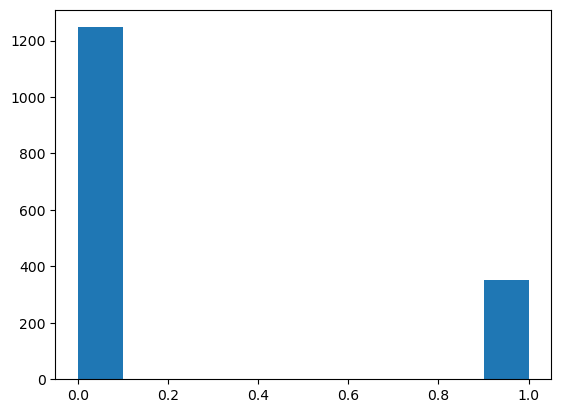

In [68]:
import matplotlib.pyplot as plt

plt.hist(y_train)


In [69]:
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
log_reg = LogisticRegression(max_iter=2000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

In [71]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the dataset
df = pd.read_excel("NEWdataset.xlsx")

# Assuming that you have already defined your features (X) and target variable (y)
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Get the feature importance (the coefficients of the logistic regression model)
feature_importance = abs(model.coef_[0])

# Use statsmodels to calculate standard errors and p-values
X_train = sm.add_constant(X_train)
# Add a constant term for the intercept
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Create a DataFrame to display the coefficients along with standard error and p-values
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0], "Standard Error": result.bse[1:], "P-value": result.pvalues[1:].round(3)})

# Display the output in tabular form
print(coef_df.to_string(index=False))

Optimization terminated successfully.
         Current function value: 0.474660
         Iterations 7
  Feature  Coefficient  Standard Error  P-value
LIMIT_BAL    -0.014681        0.085340    0.869
   GENDER    -0.017449        0.065149    0.784
EDUCATION    -0.055334        0.070807    0.432
 MARRIAGE    -0.096368        0.069678    0.163
      AGE     0.108469        0.070944    0.124
    PAY_1     0.596000        0.081785    0.000
    PAY_2    -0.150899        0.107681    0.150
    PAY_3     0.259594        0.124189    0.034
    PAY_4    -0.084311        0.141009    0.517
    PAY_5     0.212894        0.143138    0.126
    PAY_6    -0.117503        0.117009    0.312
BILL_AMT1    -0.447483        0.347839    0.142
BILL_AMT2     0.019658        0.439413    0.943
BILL_AMT3     0.509319        0.380267    0.124
BILL_AMT4     0.428513        0.262450    0.085
BILL_AMT5    -0.244082        0.396684    0.488
BILL_AMT6    -0.318504        0.324075    0.300
 PAY_AMT1    -0.324549        0.17

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import tabulate

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate the ROC AUC
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Print the performance metrics
accuracy, precision, recall, roc_auc

# Print the performance metrics in tabular form
print(tabulate.tabulate([
    ('Accuracy', accuracy),
    ('Precision', precision),
    ('Recall', recall),
    ('ROC AUC', roc_auc),], headers=['Metric', 'Value']))


# Save the output to a spreadsheet
df.to_excel("PARC.xlsx")

Metric         Value
---------  ---------
Accuracy   0.81
Precision  0.727273
Recall     0.0987654
ROC AUC    0.711637


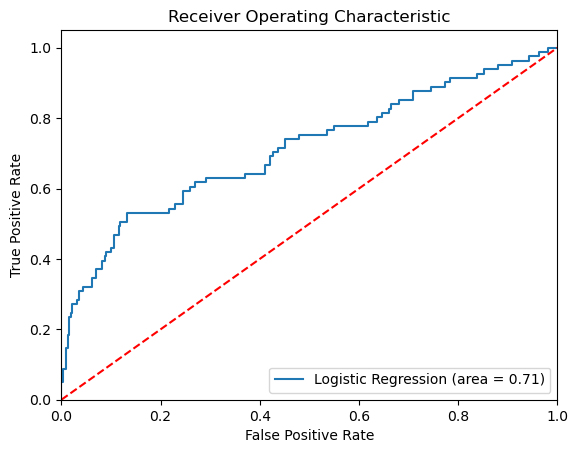

In [73]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

C:\Users\sarsw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


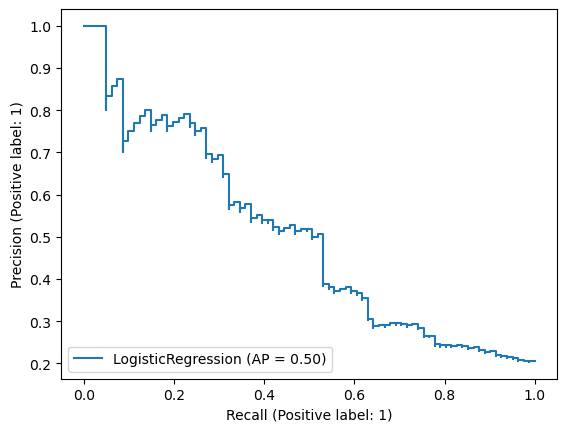

In [20]:
# plot roc_auc curve
plot_precision_recall_curve(model,X_test,y_test)